# Pymaceuticals Inc.
---
### Analysis
- The highest number of mice was treated with Capomulin, with 230 treatments, and Propiva recorded only 148, proving to be the least of all Drug Regimen treatments.
- The correlation coefficient was used to calculate the relationship between mouse weight and average tumor volume, and the linear regression provides insights into the relationship. 
- The scatter plot shows a positive trend between mouse weight and average tumor volume.
- With the Drug Regimen treatment in use, the analysis shows a valuable relationship between average tumor volume and mouse weight.


%matplotlib widget

In [110]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Display the data table for preview


In [2]:
#checking the 1st dataframe for corresponding columns
mouse_metadata.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [3]:
##checking the 2nd dataframe for corresponding columns
study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [4]:

# Combine the data into a single DataFrame and displaying for preview
clinical_data_df = pd.merge(mouse_metadata, study_results, on ='Mouse ID')
clinical_data_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [5]:
# Checking the number of mice.
mice = clinical_data_df['Mouse ID'].nunique()
mice


249

In [6]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice_ID = clinical_data_df.loc[clinical_data_df.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
duplicate_mice_ID

array(['g989'], dtype=object)

In [7]:
# Optional: Get all the data for the duplicate mouse ID. The code below shows the Ids of the duplicates
duplicate_mice_data = clinical_data_df[clinical_data_df['Mouse ID'].isin(duplicate_mice_ID)]
duplicate_mice_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [8]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.The new data cleaned will be named clean_df. 
#The duplicates will be dropped on mouse ID, leaving unique entries for the new dataframe
clean_df = clinical_data_df[clinical_data_df['Mouse ID'].isin(duplicate_mice_ID)==False]
clean_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [9]:
# Checking the number of mice in the clean DataFrame by creating unique entries of the Mouse ID
mice_count = clean_df['Mouse ID'].nunique()
mice_count

248

## Summary Statistics

In [138]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
mean = clean_df['Tumor Volume (mm3)'].groupby(clean_df['Drug Regimen']).mean()
median = clean_df['Tumor Volume (mm3)'].groupby(clean_df['Drug Regimen']).median()
var = clean_df['Tumor Volume (mm3)'].groupby(clean_df['Drug Regimen']).var()
std = clean_df['Tumor Volume (mm3)'].groupby(clean_df['Drug Regimen']).std()
sem = clean_df['Tumor Volume (mm3)'].groupby(clean_df['Drug Regimen']).sem()

summary_stats = pd.DataFrame(
    {"Mean Tumor Volume":mean, 
     "Median Tumor Volume":median, 
     "Tumor Volume Variance":var, 
     "Tumor Volume Std. Dev.":std, 
     "Tumor Volume Std. Err.":sem
    })
summary_stats

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [11]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_statistics = clean_df.groupby('Drug Regimen').agg(
    mean=('Tumor Volume (mm3)', 'mean'),
    median=('Tumor Volume (mm3)', 'median'),
    variance=('Tumor Volume (mm3)', 'var'),
    std_dev=('Tumor Volume (mm3)', 'std'),
    sem=('Tumor Volume (mm3)', 'sem')
)
summary_statistics

,mean,median,variance,std_dev,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

In [12]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
#1st step #Count the number of datapoints
Drug_Regimen_rows = clean_df['Drug Regimen'].value_counts()
Drug_Regimen_rows

Drug Regimen
Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Placebo      181
Stelasyn     181
Infubinol    178
Ceftamin     178
Propriva     148
Name: count, dtype: int64

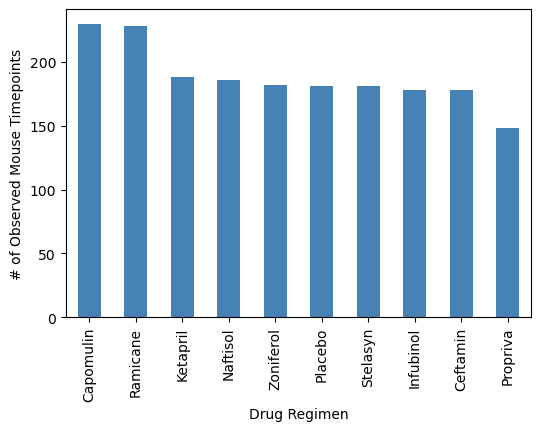

In [13]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
Drug_Regimen_rows.plot(kind='bar',figsize=(6,4), color = 'SteelBlue')
#creating labels for the bar chat, title, xlabel,and ylabels
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')
#set xticks to 20 for clearer view
plt.xticks(rotation=90)
#showing the plot
plt.show()

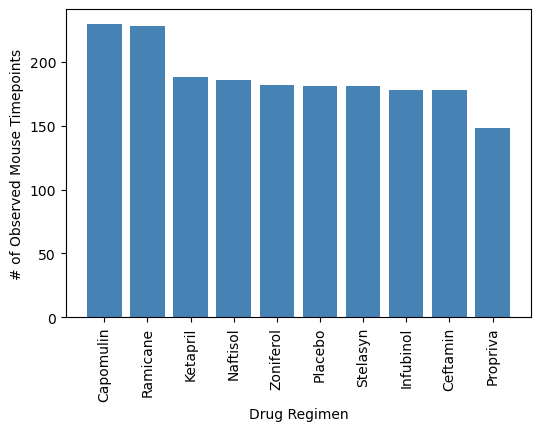

In [14]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
#exracting the drug regiment rows 
x_axis = Drug_Regimen_rows.index
y_axis = Drug_Regimen_rows.values
#creating the plot with fig size 8,8, green color,and center alignment
plt.figure(figsize=(6, 4))
plt.bar(x_axis, y_axis, color='steelblue', align='center')
#adding labels and titles
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
#set xticks to 20 for clearer view of the xlabels
plt.xticks(rotation=90)
#show the plot
plt.show()


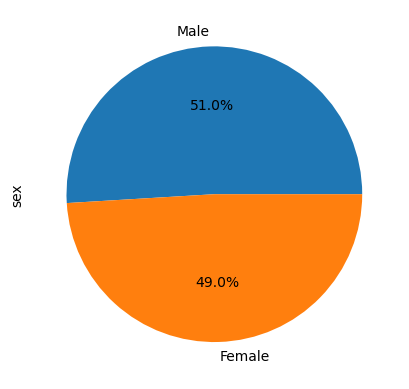

In [15]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
# Calculate the count of male and female mice
plt.figure()
gender_counts = clean_df['Sex'].value_counts()
# Plot the pie chart using Pandas
gender_counts.plot.pie(autopct="%1.1f%%",shadow=False)
plt.ylabel("sex")
plt.show()

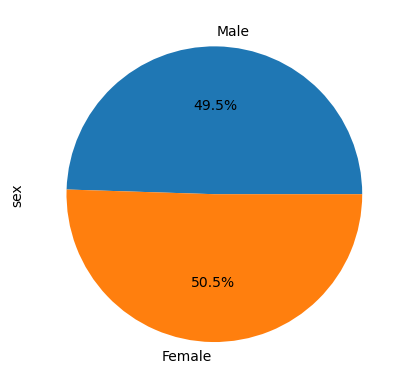

In [16]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ['Male','Female']
sizes = [49, 50]
plt.pie(sizes, labels=labels, autopct = '%1.1f%%')
plt.ylabel("sex")
plt.show()

## Quartiles, Outliers and Boxplots

In [124]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
most_promising_treatment = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
filtered_df = clean_df[clean_df['Drug Regimen'].isin(most_promising_treatment)]

# Group by mouse ID and find the last (greatest) timepoint for each mouse
max_timepoint = filtered_df.groupby('Mouse ID')['Timepoint'].max()

# Merge with the original DataFrame to get tumor volume at the last timepoint
Merged_df = pd.merge(max_timepoint.reset_index(), filtered_df, how='left', on=['Mouse ID', 'Timepoint'])[['Mouse ID', 'Tumor Volume (mm3)']]
Merged_df


,Mouse ID,Tumor Volume (mm3)
0,a203,67.973419
1,a251,65.525743
2,a275,62.999356
3,a411,38.407618
4,a444,43.047543
...,...,...
95,y769,68.594745
96,y793,31.896238
97,y865,64.729837
98,z578,30.638696


In [123]:

# List of treatments for the for loop and plot labels
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create an empty list to fill with tumor volume data for plotting
tumor_vol_df = []

# Loop through each treatment
for treatment in treatments:
    # Filter the data for the current treatment
    treatment_df = clean_df[clean_df['Drug Regimen'] == treatment]['Tumor Volume (mm3)']
    
    # Append the tumor volume data to the list
    tumor_vol_df.append(treatment_df)
    
    # Calculate quartiles, IQR, upper bound, and lower bounds
    quartiles = treatment_data.quantile([0.25, 0.5, 0.75])
    lower_quartile = quartiles[0.25]
    upper_quartile = quartiles[0.75]
    iqr = upper_quartile - lower_quartile
    
    # Calculate lower and upper bounds for outliers
    lower_bound = lower_quartile - 1.5 * iqr
    upper_bound = upper_quartile + 1.5 * iqr
    
    outliers = treatment_df[(treatment_df < lower_bound) | (treatment_df > upper_bound)]
    
    # Print results
    print(f"Results for {treatment}:")
    print(f"  Lower Quartile: {lower_quartile}")
    print(f"  Upper Quartile: {upper_quartile}")
    print(f"  Interquartile Range (IQR): {iqr}")
    print(f"  Lower Bound: {lower_bound}")
    print(f"  Upper Bound: {upper_bound}")
    print(f"  Potential Outliers: {outliers.tolist()}\n")


Results for Capomulin:
  Lower Quartile: 47.2084271125
  Upper Quartile: 56.801437570000004
  Interquartile Range (IQR): 9.593010457500007
  Lower Bound: 32.81891142624998
  Upper Bound: 71.19095325625001
  Potential Outliers: [28.32853059, 25.47214326, 23.34359787, 30.20682488, 28.16739732, 28.48403281, 31.75827491, 30.83435704, 31.3780453, 28.43096411, 32.62300253, 30.48598484, 31.02392294, 31.47541076, 31.8962384, 32.68065459, 31.80484133, 32.37735684, 32.56283914]

Results for Ramicane:
  Lower Quartile: 47.2084271125
  Upper Quartile: 56.801437570000004
  Interquartile Range (IQR): 9.593010457500007
  Lower Bound: 32.81891142624998
  Upper Bound: 71.19095325625001
  Potential Outliers: [31.09949753, 26.54699343, 24.36550471, 22.05012627, 30.96039194, 31.36940573, 29.12847181, 32.79817119, 30.27623175, 30.56462509, 30.63869575, 31.00186078, 31.56046955, 31.09533505]

Results for Infubinol:
  Lower Quartile: 47.2084271125
  Upper Quartile: 56.801437570000004
  Interquartile Range (I

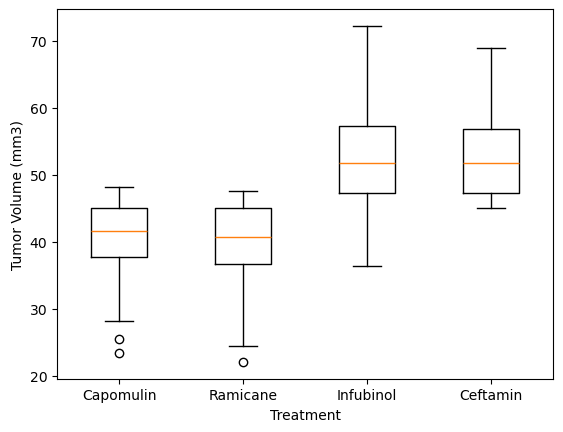

In [92]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
# Create a box plot
figure, ax1 = plt.subplots()
ax1.boxplot(tumor_vol_df, labels=treatments)

# Add x_label, y_label and title
ax1.set_xlabel('Treatment')
ax1.set_ylabel('Tumor Volume (mm3)')
#show plot
plt.show()

## Line and Scatter Plots

In [80]:
#Display filtered data to select a single mouse treated with capomulin
Capomulin_df = clean_df[clean_df['Drug Regimen'] == 'Capomulin']
Capomulin_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0


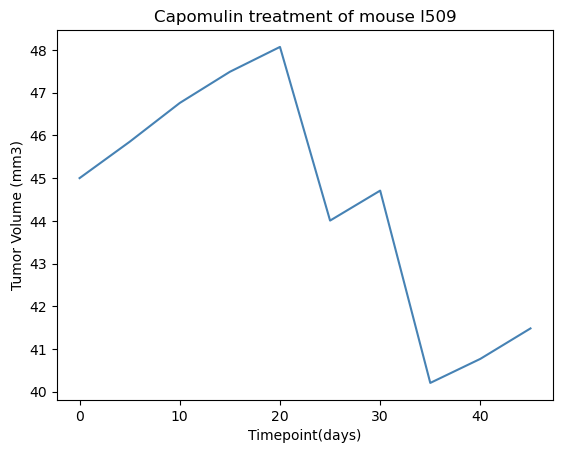

In [68]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
#Filter the data for mice treated with Capomulin
Capomulin_df = clean_df[clean_df['Drug Regimen'] == 'Capomulin']
#Choose a single mouse ID from the filtered data, and also as shown on the sample plot
mouse_id = 'l509'  
# Filter data for the chosen mouse
mouse_data = Capomulin_df[Capomulin_df['Mouse ID'] == mouse_id]

plt.plot(mouse_data['Timepoint'], mouse_data['Tumor Volume (mm3)'], color='steelblue', linestyle='-')

# Add x_label, y_label and title
plt.xlabel('Timepoint(days)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Capomulin treatment of mouse l509')
# Show plot
plt.show()

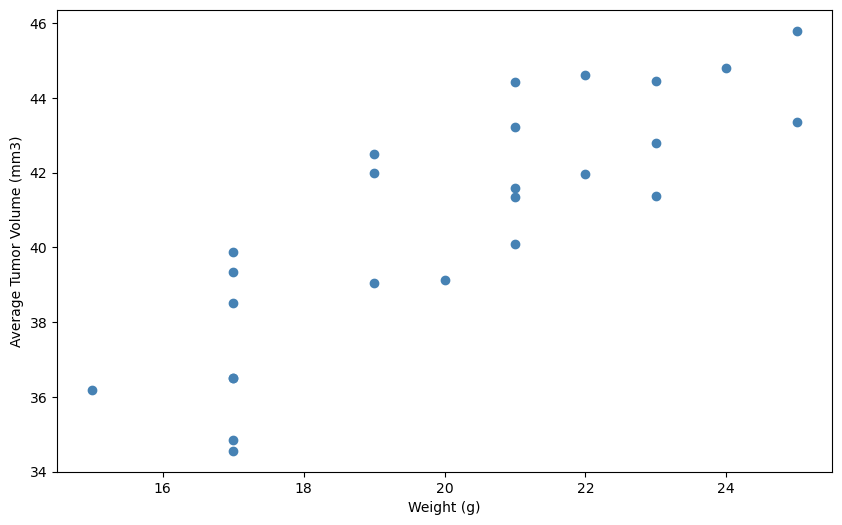

In [102]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
#Filter the DataFrame for mice treated with Capomulin
capomulin_data = clean_df[clean_df['Drug Regimen'] == 'Capomulin']

#Group by mouse ID and calculate the average tumor volume
average_tumor_volume = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()

#Merge average tumor volume with mouse weight data
merged_df = pd.merge(average_tumor_volume, capomulin_data[['Mouse ID', 'Weight (g)']], on='Mouse ID').drop_duplicates()

#Creating the plot
plt.figure(figsize=(10, 6))
plt.scatter(merged_df['Weight (g)'], merged_df['Tumor Volume (mm3)'], color='steelblue', alpha=1)

# Add x_label, y_label and title
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

#Show plot
plt.show()

## Correlation and Regression

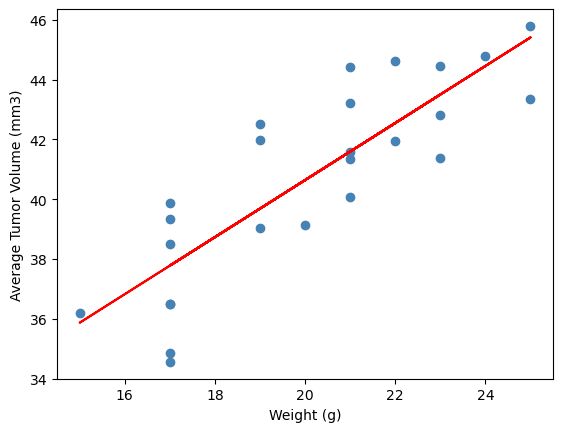

In [120]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
#Filter the DataFrame for mice treated with Capomulin
capomulin_df = clean_df[clean_df['Drug Regimen'] == 'Capomulin']
average_tumor_volume = capomulin_df.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()

#Merge average tumor volume with mouse weight data
merged_df = pd.merge(average_tumor_volume, capomulin_data[['Mouse ID', 'Weight (g)']], on='Mouse ID').drop_duplicates()

#Calculate the correlation coefficient
correlation_coefficient = np.corrcoef(merged_df['Weight (g)'], merged_df['Tumor Volume (mm3)'])[0, 1]

#Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(merged_df['Weight (g)'], merged_df['Tumor Volume (mm3)'])

#Plot the linear regression
plt.scatter(merged_df['Weight (g)'], merged_df['Tumor Volume (mm3)'], color='steelblue', alpha=1)
plt.plot(merged_df['Weight (g)'], intercept + slope * merged_df['Weight (g)'], color='red', linestyle='-', label='Regression Line')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
# Show plot
plt.show()